In [1]:
%matplotlib widget

In [2]:
isdark = False

In [3]:
# initialization
from rayoptics.environment import *

In [4]:
root_pth = Path(rayoptics.__file__).resolve().parent

In [5]:
app = AppManager(None)

# Open the model

In [6]:
app.model = open_model(root_pth/"codev/tests/questar35.seq")
opm = app.model
sm  = opm['seq_model']
osp = opm['optical_spec']
pm = opm['parax_model']
em = opm['ele_model']
pt = opm['part_tree']
ar = opm['analysis_results']

## List the sequential model

In [7]:
sm.list_model()

              c            t        medium     mode   zdr      sd
  Obj:     0.000000  1.00000e+11       air             1  4.3634e+08
    1:    -0.277967     0.284175     N-BK7             1      1.7520
    2:    -0.265659      6.61800       air             1      1.8336
 Stop:    -0.062198     -6.61800       air    reflect -1      1.8457
    4:    -0.265659      10.2153       air    reflect  1     0.38287
  Img:     0.000000      0.00000                       1     0.22038


## Update the model

In [8]:
opm.update_model()

## List the paraxial model and first order properties

In [9]:
pm.list_model()

           ax_ht        pr_ht       ax_slp       pr_slp         power          tau        index    type
 0:            0 -4.36335e+08  1.75197e-11   0.00436335             0        1e+11      1.00000    dummy
 1:      1.75197   -0.0277129     0.252394  0.000370945    -0.1440632      0.18717      1.51827    transmit
 2:      1.79921   -0.0276435   0.00467172   0.00417701     0.1376841        6.618      1.00000    transmit
 3:      1.83013 -1.74368e-08    -0.222988   0.00417701     0.1243955        6.618     -1.00000    reflect
 4:     0.354393    0.0276434   -0.0346924    0.0188645    -0.5313177      10.2153      1.00000    reflect
 5:  8.84747e-10     0.220349   -0.0346924    0.0188645             0            0      1.00000    dummy


In [10]:
pm.first_order_data()

efl                50.5
ffl                -212
pp1              -161.5
bfl               10.22
ppk               40.28
f/#               14.41
m             -5.05e-10
red           -1.98e+09
obj_dist          1e+11
obj_ang            0.25
enp_dist          6.351
enp_radius        1.752
na obj        1.752e-11
n obj                 1
img_dist          10.22
img_ht           0.2203
exp_dist         -1.465
exp_radius       0.4052
na img         -0.03467
n img                 1
optical invariant     0.007644


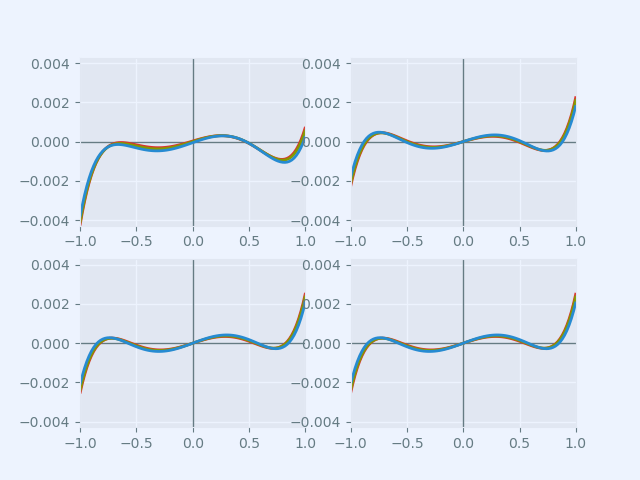

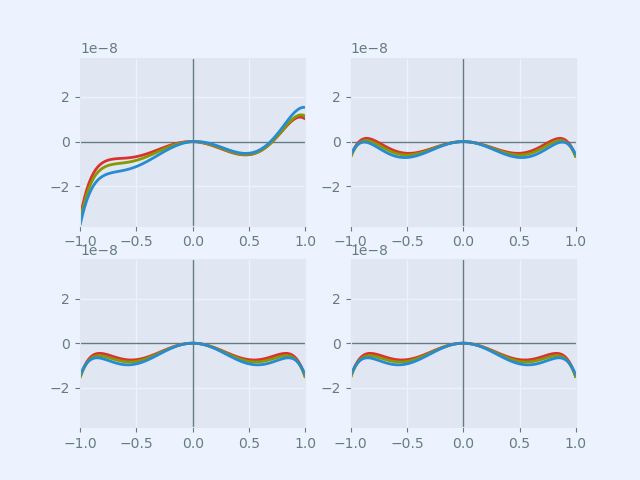

In [11]:
abr_fan_plt = plt.figure(FigureClass=RayFanFigure, opt_model=opm, data_type='Ray', scale_type=Fit.All_Same, is_dark=isdark).plot()
wav_fan_plt = plt.figure(FigureClass=RayFanFigure, opt_model=opm, data_type='OPD', scale_type=Fit.All_Same, is_dark=isdark).plot()

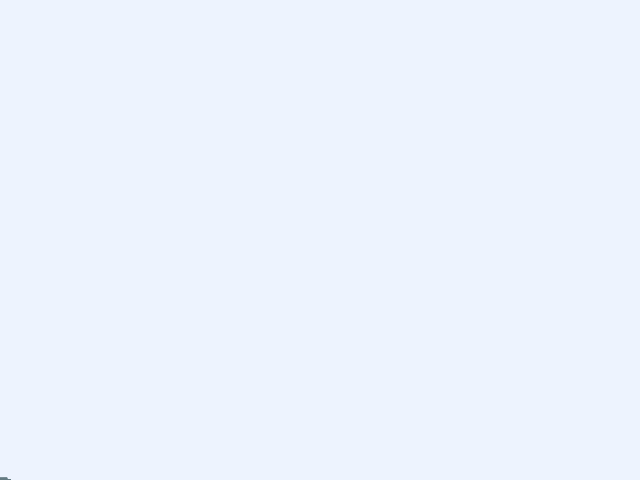

In [12]:
layout_plt = plt.figure(FigureClass=InteractiveLayout, opt_model=opm, offset_factor=0.1,
                        do_draw_rays=True, do_paraxial_layout=False, is_dark=isdark)

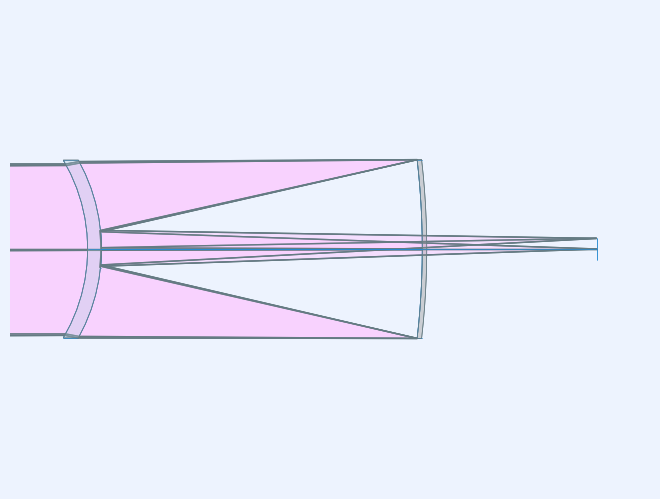

In [13]:
layout_plt.refresh()

In [14]:
pm.first_order_data()

efl                50.5
ffl                -212
pp1              -161.5
bfl               10.22
ppk               40.28
f/#               14.41
m             -5.05e-10
red           -1.98e+09
obj_dist          1e+11
obj_ang            0.25
enp_dist          6.351
enp_radius        1.752
na obj        1.752e-11
n obj                 1
img_dist          10.22
img_ht           0.2203
exp_dist         -1.465
exp_radius       0.4052
na img         -0.03467
n img                 1
optical invariant     0.007644


In [15]:
layout_plt.ele_bbox

array([[-0.50232203, -1.84565091],
       [10.49945964,  1.84565091]])

In [16]:
layout_plt.layout.system_length(layout_plt.ele_bbox, 0.1)

(21.217066300249016, 2.1217066300249017)

In [17]:
print(opm.specsheet)

infinite conjugates:
imager: IdealImager(m=-0.0, s=-inf, sp=50.49999999999967, tt=inf, f=50.49999999999967)
imager inputs: {'s': -inf}
frozen imager inputs: [True, True, True, True, False]
etendue inputs:
  field:    {'object': {'angle': 0.0}, 'image': {}}
  aperture: {'object': {'pupil': 3.503937007874016}, 'image': {}}
etendue values:
  field:    {'object': {'angle': 0.0}, 'image': {'height': 0.0}}
  aperture:
    object: {'pupil': 3.503937007874016, 'NA': 0, 'f/#': 0}
    image:  {'f/#': -14.412359550561703, 'NA': 0.03467158712881029, 'pupil': -3.503937007874016}


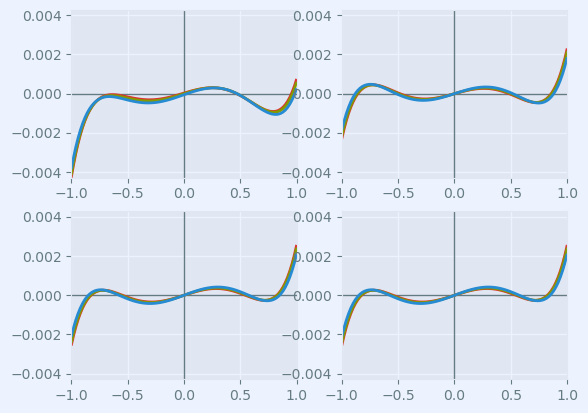

In [18]:
abr_fan_plt.refresh()

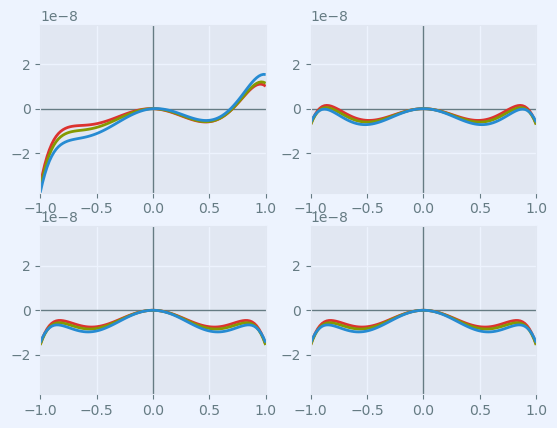

In [19]:
wav_fan_plt.refresh()

## Trace and display a wavefront as a contour plot

In [20]:
fld, wvl, foc = osp.lookup_fld_wvl_focus(1)
grid=sm.trace_wavefront(fld, wvl, foc, num_rays=64)

In [21]:
grid = np.rollaxis(grid, 2)
max_val = max(np.max(grid[2]), -np.min(grid[2])); max_val

3.4191800991548814e-08

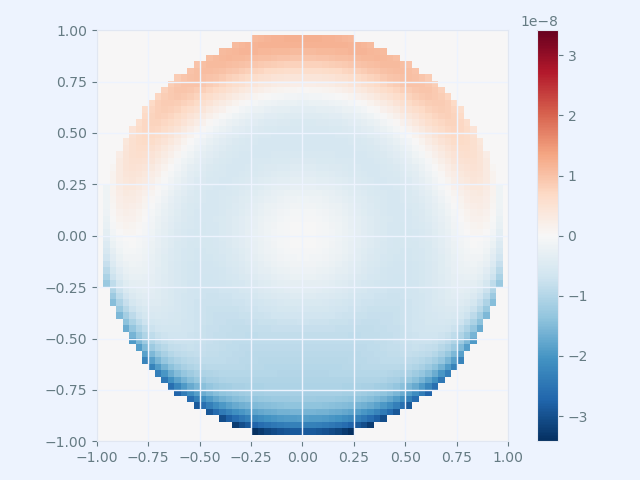

In [22]:
fig, axes = plt.subplots()
#fig, axes = plt.subplots(1, 2, figsize=(8, 4))
im = axes.imshow(grid[2].T, cmap=mpl.cm.RdBu_r, vmin=-max_val, vmax=max_val, extent=[-1, 1, -1, 1], origin='lower')
#im.set_interpolation('bilinear')
cb = fig.colorbar(im, ax=axes)
fig.tight_layout()

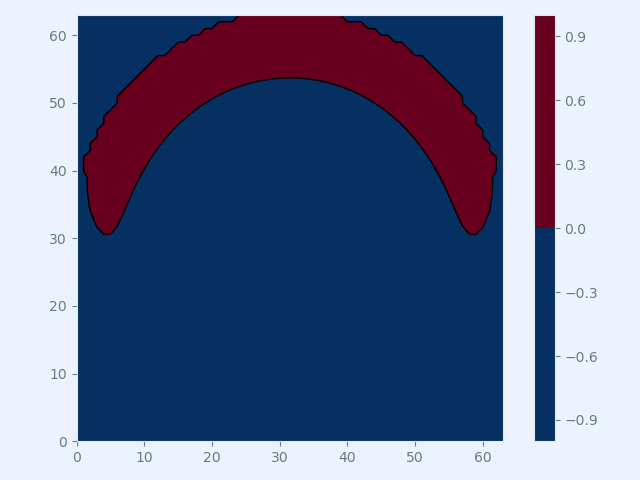

In [23]:
fig, ax = plt.subplots()
vmin = -max_val
vmax = max_val
levs = np.linspace(np.floor(vmin), np.ceil(vmax), num=21)

ax.contour(grid[2].T, levs, colors='black', linewidths=1, vmin=vmin, vmax=vmax)
cs = ax.contourf(grid[2].T, levs, cmap=mpl.cm.RdBu_r, vmin=vmin, vmax=vmax)
fig.colorbar(cs)
ax.set_aspect('equal')
fig.tight_layout()
plt.show()

In [24]:
em.list_model()

0: Object (DummyInterface): Surface(lbl='Obj', profile=Spherical(c=0.0), interact_mode='dummy')
1: E1 (Element): Element: Spherical(c=-0.2779672329376499), Spherical(c=-0.2656588696905559), t=0.2842, sd=1.8336, glass: N-BK7
2: M1 (Mirror): Mirror: Spherical(c=-0.06219776663591262), t=0.0923, sd=1.8457
3: M2 (Mirror): Mirror: Spherical(c=-0.2656588696905559), t=0.0191, sd=0.3829
4: Image (DummyInterface): Surface(lbl='Img', profile=Spherical(c=0.0), interact_mode='dummy')


In [25]:
matches = sm.find_matching_ifcs(); matches

coincident surfs: 2 - 4


[(2, 4)]

In [26]:
opm['pt'].list_tree()

root
├── Object
│   └── p
│       └── i0
├── Object space
│   └── t
│       └── g0
├── E1
│   ├── p1
│   │   └── i1
│   ├── t
│   │   └── g1
│   └── p2
│       └── i2
├── AG1
│   └── t
│       └── g2
├── M1
│   └── p
│       └── i3
├── AG2
│   └── t
│       └── g3
├── M2
│   └── p
│       └── i4
├── Image space
│   └── t
│       └── g4
└── Image
    └── p
        └── i5
